# Trabalhando com Dados do Excel

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel('/content/Aracaju.xlsx')
df2 = pd.read_excel('/content/Fortaleza.xlsx')
df3 = pd.read_excel('/content/Natal.xlsx')
df4 = pd.read_excel('/content/Recife.xlsx')
df5 = pd.read_excel('/content/Salvador.xlsx')

In [ ]:
df1.head(2)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6


In [ ]:
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
df.head(3)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1


In [ ]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde
225,Salvador,2019-01-02,36.23,1035,1


In [ ]:
df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
df.head(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55


In [ ]:
df['Receita'].max()

3544.0

In [ ]:
df['Receita'].min()

3.34

In [ ]:
df.nlargest(5, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


In [ ]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


## Trabalhando com Datas

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
# se precisar tranformar em data usar pd.to_datetime(...)

In [ ]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
df['Ano Venda'] = df['Data'].dt.year

In [ ]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda
107,Natal,2019-01-02,14.7,1035,1,14.7,2019


In [ ]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
df['Trimestre Vendas'] = df['Data'].dt.quarter

In [ ]:
df.sample(12)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,Trimestre Vendas
36,Recife,2019-01-01,146.62,983,6,879.72,2019,1
5,Recife,2019-01-01,13.59,980,3,40.77,2019,1
107,Aracaju,2018-01-01,142.57,1523,3,427.71,2018,1
97,Natal,2019-01-02,39.91,1037,3,119.73,2019,1
120,Natal,2019-01-02,140.17,1036,2,280.34,2019,1
1,Fortaleza,2019-01-01,115.61,1002,3,346.83,2019,1
13,Fortaleza,2019-02-12,118.58,1003,4,474.32,2019,1
4,Salvador,2019-02-14,19.47,1037,3,58.41,2019,1
26,Salvador,2019-01-01,183.45,1036,3,550.35,2019,1
37,Fortaleza,2019-01-01,35.86,1002,6,215.16,2019,1


In [ ]:
# para localizar usar o df.loc(df['data'].dt.year == 2019 & mes ou dia...)

In [ ]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<Axes: >

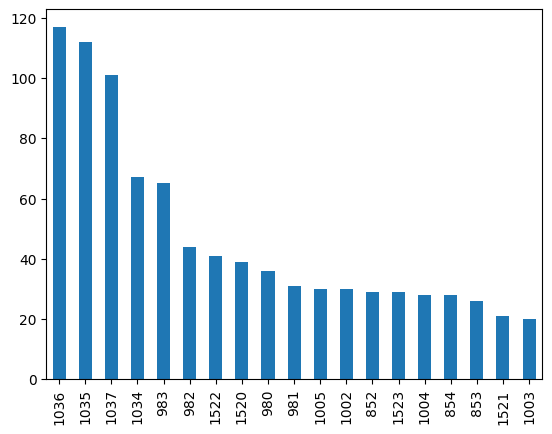

In [ ]:
df['LojaID'].value_counts(ascending=False).plot.bar()

<Axes: >

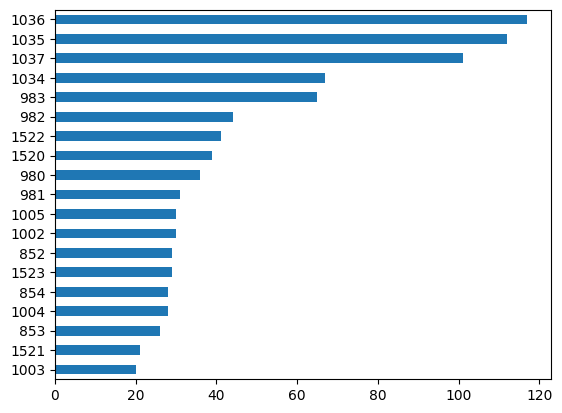

In [ ]:
df['LojaID'].value_counts(ascending=True).plot.barh()

<Axes: ylabel='Receita'>

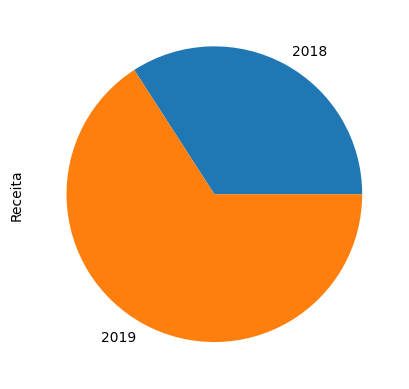

In [ ]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [ ]:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

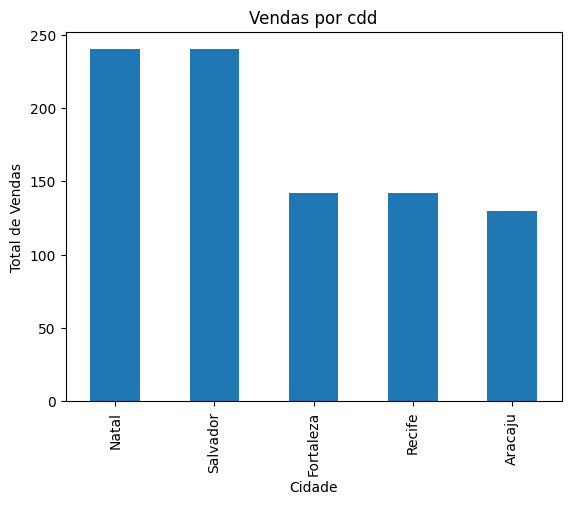

In [ ]:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Vendas por cdd')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

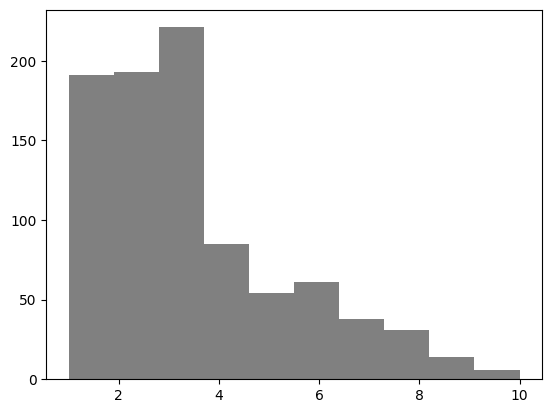

In [ ]:
plt.hist(df['Qtde'], color='grey')

In [ ]:
# para salvar figura usar plt.savefig(nome.png)